<a href="https://colab.research.google.com/github/vjihye/TIL/blob/master/3_3_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%98%81%ED%99%94%EB%A6%AC%EB%B7%B0%EB%B6%84%EB%A5%98_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
print(train_labels[0])

1


In [ ]:
print(max([max(sequence) for sequence in train_data]))

9999


In [ ]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

정수 시퀀스를 이진 행렬로 인코딩

In [ ]:
def vectorize_sequences(seqs, dim=10000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

• 훈련 검증(10000개의 샘플을 떼어 검증세트를 만든다)

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

- 모델을 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련시킴
(x_train과 y_train 텐서에 있는 모든 샘플에 대해 20번 반복)
- 동시에 따로 떼어놓은 1만개의 샘플에서 손실과 정확도를 측정


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=50, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/50
30/30 [==============================] - 2s 50ms/step - loss: 0.5347 - acc: 0.7739 - val_loss: 0.4050 - val_acc: 0.8712
Epoch 2/50
30/30 [==============================] - 1s 36ms/step - loss: 0.3277 - acc: 0.8962 - val_loss: 0.3179 - val_acc: 0.8873
Epoch 3/50
30/30 [==============================] - 1s 35ms/step - loss: 0.2384 - acc: 0.9233 - val_loss: 0.2924 - val_acc: 0.8860
Epoch 4/50
30/30 [==============================] - 1s 35ms/step - loss: 0.1880 - acc: 0.9389 - val_loss: 0.2730 - val_acc: 0.8936
Epoch 5/50
30/30 [==============================] - 1s 38ms/step - loss: 0.1507 - acc: 0.9524 - val_loss: 0.2984 - val_acc: 0.8802
Epoch 6/50
30/30 [==============================] - 1s 35ms/step - loss: 0.1268 - acc: 0.9600 - val_loss: 0.2931 - val_acc: 0.8866
Epoch 7/50
30/30 [==============================] - 1s 40ms/step - loss: 0.1043 - acc: 0.9694 - val_loss: 0.3012 - val_acc: 0.8835
Epoch 8/50
30/30 [==============================] - 1s 39ms/step - loss: 0.0882 - a

model.fit() 메서드는 History 객체를 반환 → 훈련하는 동안 발생한 모든 정보
를 담고 있는 딕셔너리인 history 속성을 가지고 있음

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [ ]:
import matplotlib.pyplot as plt

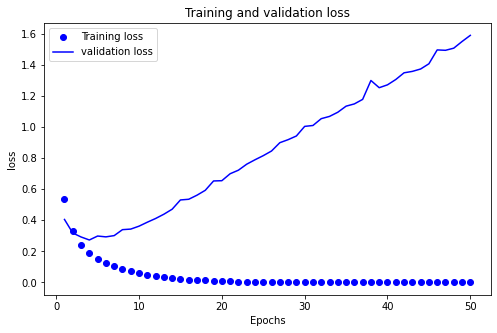

In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize = (8, 5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


<Figure size 432x288 with 0 Axes>

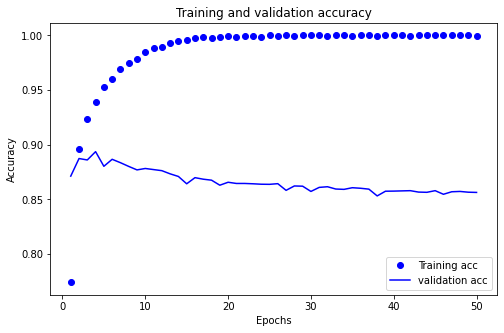

In [ ]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.figure(figsize = (8, 5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

• 과대적합을 방지하기 위해 세번째 에포크 이후에 훈련을 중지할 수 있음

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4445 - acc: 0.8253
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2553 - acc: 0.9103
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.1971 - acc: 0.9307
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3232 - acc: 0.8717
[0.3232018053531647, 0.871720016002655]


• 훈련된 모델로 새로운 데이터에 대해 예측

In [ ]:
predictions = model.predict(x_test)
predictions

array([[0.2789945 ],
       [0.99952984],
       [0.965363  ],
       ...,
       [0.18218592],
       [0.10335195],
       [0.7646762 ]], dtype=float32)

In [ ]:
np.argmax(predictions[0])

0

In [ ]:
test_labels[0]

0